# Trajectory Analysis 

In this notebook file, we will give a detail analysis of trajectories extracted from `trajectory_construction` notebook file.

The analysis is based on two files `trajectory_photos.csv` and `trajectory_stats.csv`. The first file keeps the detail information about each point(photo/video) in each trajectory, and the second file keeps the detail statistics about each trajectory.

And at the end of the notebook, we will show how to generate KML data which helps to plot trajectories on various map services (e.g. Google Map), and show some example of interesting trajectories on the Google Map.

## Table of Contents

* [1. Basic data files](#1.-Basic-data-files)
    * [1.1. Contents of trajectory table](#1.1.-Contents-of-trajectory-table)
    * [1.2. Contents of trajectory statistics table](#1.2.-Contents-of-trajectory-statistics-table)
* [2. Basic Statistics](#2.-Basic-Statistics)
    * [2.1. Number of users, trajectories, and average trajectories per user](#2.1.-Number-of-users,-trajectories,-and-average-trajectories-per-user)
    * [2.2. Min/Max/Median/Mean of each attribute](#2.2.-Min/Max/Median/Mean-of-each-attribute)
    * [2.3 Number of Photos by year](#2.3-Number-of-Photos-by-year)
* [3. Distributions](#3.-Distributions)
    * [3.1. Bar chart: Accuracy of photos](#3.1.-Bar-chart:-Accuracy-of-photos)
    * [3.2. Histogram: Travel time](#3.2.-Histogram:-Travel-time)
    * [3.3. Histogram: Distances of trajectory](#3.3.-Histogram:-Distances-of-trajectory)
    * [3.4. Histogram: Average Speed](#3.4.-Histogram:-Average-Speed)    
* [4. Trajectory Visualization](#4.-Trajectory-Visualization)
    * [4.1. Generating KML files with trajectory ID](#4.1.-Generating-KML-files-with-trajectory-ID)
    * [4.2. Example of interesting trajectories](#4.2.-Example-of-interesting-trajectories)

Before analyzing, we need to include some libraries.

In [1]:
%matplotlib inline

import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

today = pd.datetime.strftime(pd.datetime.today(),'%Y%m%d')

# 1. Basic data files

[Pandas](http://pandas.pydata.org/) provide various data analysis tools. We will load two trajectory table files using Pandas library.

In [2]:
# read data and convert timestamps
data_dir = '../data/'
photo_table = os.path.join(data_dir, 'trajectory_photos.csv')
traj_table = os.path.join(data_dir, 'trajectory_stats.csv')
traj = pd.read_csv(photo_table, delimiter=',', parse_dates=[3], skipinitialspace=True)
traj_stats = pd.read_csv(traj_table, delimiter=',', parse_dates=[3], skipinitialspace=True)

## 1.1. Contents of trajectory table

The first table is from `trajectory-photos.csv` file.

Here's five sample entries from the trajectory table. Each entry of trajectory table corresponds to single photo/video.

The table consists of following attributes(columns):

* `Trajectory_ID`: trajectory ID of entry (multiple entries belong to the same trajectory will have the same trajectory ID)
* `Photo_ID`: Unique Photo ID of entry
* `User_ID`: User ID
* `Timestamp`: Timestamp of when the photo was taken
* `Longitude`: Longitude of entry 
* `Latitude`: Latitude of entry
* `Accuracy`: GPS Accuracy level (16 - the most accurate, 1 - the least accurate)
* `Marker`: 0 if the entry is photo, 1 if the entry is video
* `URL`: flickr URL to the entry

In [3]:
traj.head()

,Trajectory_ID,Photo_ID,User_ID,Timestamp,Longitude,Latitude,Accuracy,Marker(photo=0 video=1),URL
0,7,2930292747,10058801@N06,2008-10-11 15:56:51,144.973418,-37.818564,15,0,http://www.flickr.com/photos/10058801@N06/2930...
1,7,2931152490,10058801@N06,2008-10-11 15:56:54,144.973418,-37.818564,15,0,http://www.flickr.com/photos/10058801@N06/2931...
2,7,2930292921,10058801@N06,2008-10-11 15:56:58,144.973418,-37.818564,15,0,http://www.flickr.com/photos/10058801@N06/2930...
3,7,2931152696,10058801@N06,2008-10-11 15:57:02,144.972259,-37.817971,15,0,http://www.flickr.com/photos/10058801@N06/2931...
4,7,2930293167,10058801@N06,2008-10-11 15:57:08,144.973075,-37.817302,15,0,http://www.flickr.com/photos/10058801@N06/2930...


## 1.2. Contents of trajectory statistics table

The second table is about statistics for each trajectory. Each entry of this table corresponds to single trajectory.

This table consists of following attributes(columns):

* `Trajectory_ID`: Unique trajectory ID
* `User_ID`: User ID
* `#Photo`: Number of photos in the trajectory
* `Start_Time`: When the first photo was taken
* `Travel_Distance(km)`: Sum of the distances between consecutive photos (Euclidean Distance)
* `Total_Time(min)`: The time gap between the first photo and the last photo
* `Average_Speed(km/h)`: Travel_Distances(km)/Total_Time(h)

In [4]:
traj_stats.head()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
0,7,10058801@N06,19,2008-10-11 15:56:51,0.961212,71.366667,0.808119
1,10,10087938@N02,16,2008-03-13 01:35:32,0.781834,169.950000,0.276023
2,13,10087938@N02,25,2008-03-15 02:32:44,1.062079,494.133333,0.128963
3,19,10132296@N00,10,2011-08-13 03:05:24,1.223396,180.516667,0.406631
4,26,101884347@N06,5,2013-12-13 09:56:38,1.751772,489.733333,0.214619


# 2. Basic Statistics

## 2.1. Number of users, trajectories, and average trajectories per user

In [5]:
num_user = traj_stats['User_ID'].unique().size
num_traj = traj_stats['Trajectory_ID'].unique().size
avg_traj_per_user = num_traj/num_user
print('# users :', num_user)
print('# trajectories :', num_traj)
print('Average trajectories per user :', avg_traj_per_user)

# users : 977
# trajectories : 4460
Average trajectories per user : 4.564994882292733


## 2.2. Min/Max/Median/Mean of each attribute

In [6]:
basic_stats = pd.DataFrame([traj_stats.min(), traj_stats.max(), traj_stats.median(), traj_stats.mean()], \
                           index=['min','max', 'median', 'mean'])
basic_stats.drop('Start_Time', axis=1, inplace=True)
basic_stats.drop('Trajectory_ID', axis=1, inplace=True)
basic_stats.drop('User_ID', axis=1, inplace=True)
basic_stats

,#Photo,Average_Speed(km/h),Total_Time(min),Travel_Distance(km)
min,2.000000,0.043375,0.001662,0.099699
max,379.000000,98.850612,1351.083333,867.034519
median,6.000000,1.340931,215.566667,4.352130
mean,13.079821,4.786399,259.316410,18.972181


## 2.3 Number of Photos by year

Here's the bar chart that plots the number of photos taken by each year.

In [7]:
yeardict = dict()
for i in traj.index:
    dt = traj.ix[i]['Timestamp']
    if dt.year not in yeardict: yeardict[dt.year] = 1
    else: yeardict[dt.year] += 1

<Container object of 15 artists>

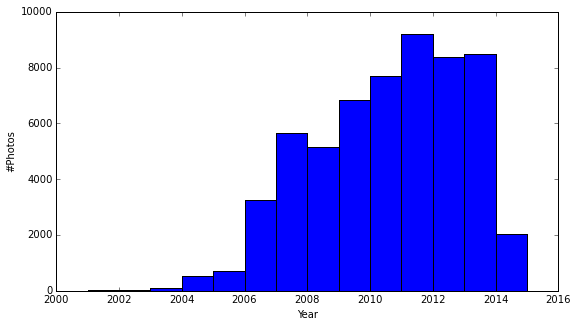

In [8]:
plt.figure(figsize=[9, 5])
plt.xlabel('Year')
plt.ylabel('#Photos')
X = list(sorted(yeardict.keys()))
Y = [yeardict[x] for x in X]
plt.bar(X, Y, width=1)

# 3. Distributions

## 3.1. Bar chart: Accuracy of photos

The original dataset provide the accuracy of geo-tag for each photo. Accuracy of 16 is the most accurate and the accuracy of 1 is the least accurate. (The default accuracy is set to 16 by Flickr when the user does not provide any accuracy information about photo.)

Here's the [Description about accuracy in Tumblr API](https://www.flickr.com/services/api/flickr.photos.geo.setLocation.html)


Number and % of points at max accuracy (16) 33905 0.5831011591511024
Number and % of points at accuracy >=12 56673 0.974667217005469


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113395c18>], dtype=object)

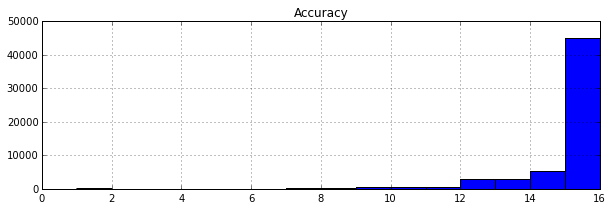

In [9]:
print("Number and % of points at max accuracy (16)", len(traj[traj['Accuracy']==16]), \
      1.*len(traj[traj['Accuracy']==16])/len(traj))
print("Number and % of points at accuracy >=12", len(traj[traj['Accuracy']>=11]), \
      1.*len(traj[traj['Accuracy']>=11])/len(traj))

ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj.hist(column=['Accuracy'], bins=15, ax=ax1)

## 3.2. Histogram: Travel time

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114f69550>], dtype=object)

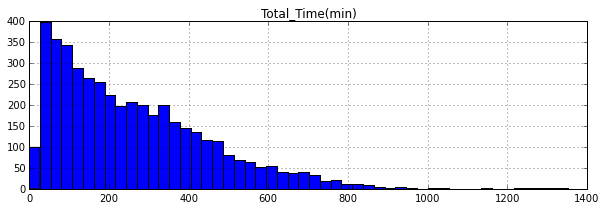

In [10]:
ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj_stats.hist(column='Total_Time(min)', bins=50, ax=ax1)

## 3.3. Histogram: Distances of trajectory

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1146dd2e8>], dtype=object)

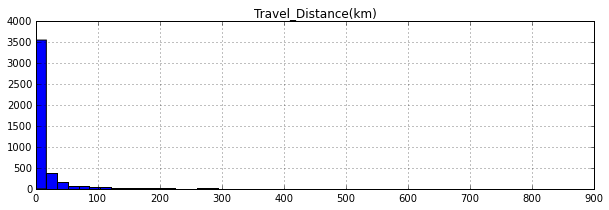

In [11]:
ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj_stats.hist(column='Travel_Distance(km)', bins=50, ax=ax1)

## 3.4. Histogram: Average Speed

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1146c2b00>], dtype=object)

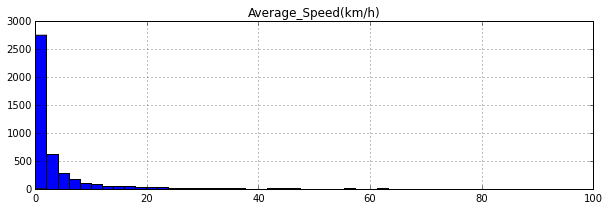

In [12]:
ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj_stats.hist(column='Average_Speed(km/h)', bins=50, ax=ax1)

## 4. Trajectory Visualization

[KML file](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) is a useful tool to visualize trajectories on commercial map services such as Google Map. 

In this section, we provide how to generate KML files for visualize trajectories on the map of Melbourne.

### 4.1. Generating KML files with trajectory ID

We implemented KML file generator in `traj_visualise.py` file. So let's first import that file.

In [13]:
import traj_visualise # for visualization on map

`traj_visualise.gen_kml` function takes list of trajectories as an input and generate KML files for the list of trajectories.

```python
def gen_kml(fname, traj_data, traj_stats, traj_id_list, traj_name_list=None)
```

* `fname`: output file path
* `traj_data`: Trajectory table
* `traj_stats`: Trajectory stat table
* `traj_id_list`: List of trajectory IDs
* `traj_name_list`: List of names for each trajectory in `traj_id_list`

Upload the generated KML files to my Google map helps navigating trajectories over map.

### 4.2. Example of interesting trajectories

In this section, we show statistics of some extreme cases in our dataset and plot these trajectories on Google map.

**Trajectory with the most number of photos:** [Link to Google Map](https://www.google.com/maps/d/viewer?mid=zbfVMoawlt38.k9zFmCKfuQ58)

<img src="./img/most_photos.png" style="width: 600px;"/>

In [14]:
mostphoto_idx = traj_stats['#Photo'].idxmax()
mostphoto_traj_id = traj_stats.ix[mostphoto_idx].Trajectory_ID

output_file = '../data/most_photos.kml'
traj_visualise.gen_kml(output_file, traj, traj_stats, [mostphoto_traj_id], ['The most number of photos'])
traj_stats.ix[mostphoto_idx]

Trajectory_ID                        17591
User_ID                       67407461@N00
#Photo                                 379
Start_Time             2010-01-15 11:33:05
Travel_Distance(km)               11.45493
Total_Time(min)                      593.5
Average_Speed(km/h)               1.158038
Name: 2938, dtype: object

**Trajectory with the longest travel time:** [Link to Google Map](https://www.google.com/maps/d/viewer?mid=zbfVMoawlt38.knIFp7fPCJX0)

<img src="./img/longest_time.png" style="width: 600px;"/>

In [15]:
time_idx = traj_stats['Total_Time(min)'].idxmax()
time_traj_id = traj_stats.ix[time_idx].Trajectory_ID

output_file = '../data/longest_time.kml'
traj_visualise.gen_kml(output_file, traj, traj_stats, [time_traj_id], ['The longest travel time'])
traj_stats.ix[time_idx]

Trajectory_ID                        18033
User_ID                       68151423@N00
#Photo                                  16
Start_Time             2002-03-18 21:37:30
Travel_Distance(km)                 864.76
Total_Time(min)                   1351.083
Average_Speed(km/h)               38.40296
Name: 3017, dtype: object

**Longest travel distance**: [Link to Google Map](https://drive.google.com/open?id=15nDAil1umZLszGL_rDlzW6TJtsE&usp=sharing)

<img src="./img/longest_distance.png" style="width: 600px;"/>

In [16]:
longest_idx = traj_stats['Travel_Distance(km)'].idxmax()
longest_traj_id = traj_stats.ix[longest_idx].Trajectory_ID

output_file = '../data/longest.kml'
traj_visualise.gen_kml(output_file, traj, traj_stats, [longest_traj_id], ['longest_traj'])
traj_stats.ix[longest_idx]

Trajectory_ID                        25668
User_ID                       97867688@N00
#Photo                                 117
Start_Time             2004-11-04 19:54:08
Travel_Distance(km)               867.0345
Total_Time(min)                   541.2833
Average_Speed(km/h)               96.10876
Name: 4260, dtype: object

**Fastest trajectory**: [Link to Google Map](https://drive.google.com/open?id=1KrKPR0on5M4GySGCVX--Za2GZeU&usp=sharing)

<img src="./img/fastest_speed.png" style="width: 600px;"/>

In [17]:
fastest_idx = traj_stats['Average_Speed(km/h)'].idxmax()
fastest_traj_id = traj_stats.ix[fastest_idx].Trajectory_ID

output_file = '../data/fastest.kml'
traj_visualise.gen_kml(output_file, traj, traj_stats, [fastest_traj_id], ['fastest_traj'])
traj_stats.ix[fastest_idx]

Trajectory_ID                         7444
User_ID                       32005048@N06
#Photo                                  82
Start_Time             2011-08-24 09:53:16
Travel_Distance(km)               182.7089
Total_Time(min)                      110.9
Average_Speed(km/h)               98.85061
Name: 1199, dtype: object